## DECISION TREES

In [1]:
import numpy as np
import pandas as pd
df_voting=pd.read_csv("/Users/noshitha/Downloads/house_votes_84.csv")

In [2]:
df_voting.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-adi,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,target
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,1
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,1
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,0
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,0
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,0


In [3]:
from sklearn.utils import shuffle
df_voting_shuffle = shuffle(df_voting)

In [4]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_voting_shuffle, test_size=0.2, random_state=34)

# Shapes of the training and testing sets
print("\nTraining Set Shape:", train_df.shape)
print("Testing Set Shape:", test_df.shape)


Training Set Shape: (348, 17)
Testing Set Shape: (87, 17)


## Algorithm

In [5]:
import pandas as pd

def check_same_class(y_train):
    # If all instances belong to the same class
    if len(set(y_train['target'])) == 1:
        return {"class_label": y_train['target'].iloc[0]}
    else:
        return {"not_same_class": True}

# Example usage
y_train = pd.DataFrame({'target': [0, 0, 0, 0, 1, 1, 1, 1]})
check=len(set(y_train['target']))
print(check)
print(set(y_train['target']))
result = check_same_class(y_train)
print(result)


2
{0, 1}
{'not_same_class': True}


## Decision Tree using info-gain

In [41]:
def decision_tree(X_train, y_train, remaining_attributes):
    # If all instances belong to the same class
    if len(set(y_train)) == 1:
        return {"class_label": y_train.iloc[0]}
    if not remaining_attributes:
        # If no more attributes left
        class_counts = y_train.value_counts()
        majority_class = class_counts.idxmax()
        return {"class_label": majority_class}
    
    
    
    info_gain_values = [information_gain(y_train, X_train[attr]) for attr in remaining_attributes]
    best_attribute = remaining_attributes[np.argmax(info_gain_values)] # Highest info gain attribute
    remaining_attributes_copy = remaining_attributes.copy()  # Make a copy
    remaining_attributes_copy.remove(best_attribute) # L(attr)-Selected(attr)
    remaining_attributes = remaining_attributes_copy.copy()  # Update remaining_attributes

    #remaining_attributes = remaining_attributes_copy  # Update remaining_attributes

    
    
    # Create a dictionary for the current decision node
    node = {"attribute": best_attribute, "leaf": {}}
    # Create a list of values for the selected attribute
    attribute_values = set(X_train[best_attribute])

    # For each attribute value, create sub-trees and edges
    for value in attribute_values:
        # Partition - based on the attribute value
        partition = X_train[X_train[best_attribute] == value]

        if partition.empty:
            # If partition is empty, leaf node = node with majority class
            majority_class = y_train.value_counts().idxmax()
            node["leaf"][value] = {"class_label": majority_class}
        else:
            # Recursively create a sub-tree
            subtree = decision_tree(partition, y_train[partition.index], remaining_attributes)
            node["leaf"][value] = subtree
    return node

def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

def information_gain(y, x):
    parent_entropy = entropy(y)
    # InfoA(D)
    info_a = 0
    for value in set(x):
        partition_indices = x[x == value].index
        partition_entropy = entropy(y[partition_indices])
        info_a += len(partition_indices) / len(x) * partition_entropy
    # GainA(D)
    gain_a = parent_entropy - info_a
    return gain_a

In [42]:
def predict_single(x, tree):
    if 'class_label' in tree:
        # Single data point
        return tree['class_label']
    else:
        value = x[tree['attribute']]
        if value in tree['leaf']:
            # leaf has only class label or a nested dictionary
            next_node = tree['leaf'][value]
            if 'class_label' in next_node:
                return next_node['class_label']
            else:
                return predict_single(x, next_node)
        else:
            return list(tree['leaf'].values())[0]


def predict(X, tree):
    return [predict_single(x, tree) for i, x in X.iterrows()]


In [43]:
attributes = df_voting_shuffle.columns[:-1].tolist()
target = df_voting_shuffle['target']
train_df, test_df = train_test_split(df_voting_shuffle, test_size=0.2, random_state=34)

In [44]:
 # Split the DataFrame into features and target for training and testing sets
X_train, y_train = train_df[attributes], train_df['target']
X_test, y_test = test_df[attributes], test_df['target']

In [45]:
# Build the decision tree using the training set
root_node = decision_tree(X_train, y_train, attributes)

In [11]:
# Function to calculate accuracy
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

# Build the decision tree using the training set
root_node = decision_tree(X_train, y_train, attributes)

# Make predictions on the training set
predictions_train = predict(X_train, root_node)

# Make predictions on the test set
predictions_test = predict(X_test, root_node)

# Evaluate the accuracy on the training set
accuracy_train = calculate_accuracy(predictions_train, y_train)
print("Accuracy on Training Set:", accuracy_train)

# Evaluate the accuracy on the test set
accuracy_test = calculate_accuracy(predictions_test, y_test)
print("Accuracy on Test Set:", accuracy_test)


Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.9310344827586207


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Function to calculate accuracy
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

# Function to train and evaluate Decision Tree 100 times
def run_decision_tree(df, attributes, target, num_iterations=100):
    accuracy_train_list = []
    accuracy_test_list = []

    for i in range(num_iterations):
        # Shuffle the dataset
        df_shuffled = shuffle(df)

        # Split the DataFrame into features and target for training and testing sets
        train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=np.random.randint(1, 1000))

        X_train, y_train = train_df[attributes], train_df[target]
        X_test, y_test = test_df[attributes], test_df[target]

        # Build the decision tree using the training set
        root_node = decision_tree(X_train, y_train, attributes)

        # Make predictions on the training set
        predictions_train = predict(X_train, root_node)
        accuracy_train = calculate_accuracy(predictions_train, y_train)
        accuracy_train_list.append(accuracy_train)

        # Make predictions on the test set
        predictions_test = predict(X_test, root_node)
        accuracy_test = calculate_accuracy(predictions_test, y_test)
        accuracy_test_list.append(accuracy_test)

    return accuracy_train_list, accuracy_test_list


In [47]:
# Run the experiment
attributes = df_voting_shuffle.columns[:-1].tolist()
target = 'target'
df_voting_shuffle = shuffle(df_voting_shuffle, random_state=np.random.randint(1, 1000))  # Shuffle once initially

accuracy_train, accuracy_test = run_decision_tree(df_voting_shuffle, attributes, target)


In [49]:
mean_accuracy_train = np.mean(accuracy_train)
mean_accuracy_test = np.mean(accuracy_test)

# Print or use the values as needed
print("Mean Training Accuracy:", mean_accuracy_train)
print("Mean Testing Accuracy:", mean_accuracy_test)

Mean Training Accuracy: 1.0
Mean Testing Accuracy: 0.9313793103448276


In [50]:

std_dev_accuracy_train = np.std(accuracy_train)
std_dev_accuracy_test = np.std(accuracy_test)

print("Standard Deviation Training Accuracy:", std_dev_accuracy_train)
print("Standard Deviation Testing Accuracy:", std_dev_accuracy_test)

Standard Deviation Training Accuracy: 0.0
Standard Deviation Testing Accuracy: 0.023129167362391723


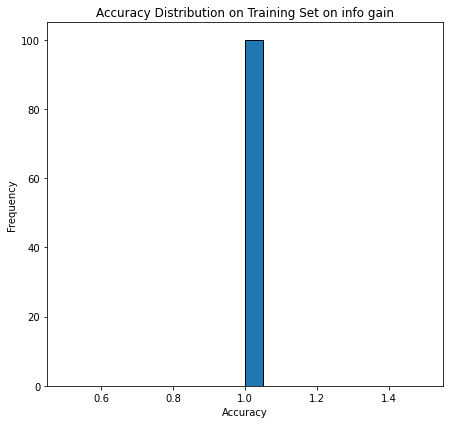

In [14]:

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(accuracy_train, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Training Set on info gain')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


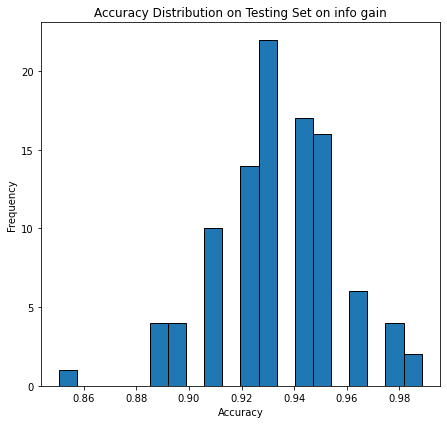

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.hist(accuracy_test, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Testing Set on info gain')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Decision Trees using Gini impurity

In [51]:
def decision_tree(X_train, y_train, remaining_attributes):
    # If all instances belong to the same class
    if len(set(y_train)) == 1:
        return {"class_label": y_train.iloc[0]}
    if not remaining_attributes:
        # If no more attributes left
        class_counts = y_train.value_counts()
        majority_class = class_counts.idxmax()
        return {"class_label": majority_class}

    info_gain_values = [information_gain(y_train, X_train[attr]) for attr in remaining_attributes]
    best_attribute = remaining_attributes[np.argmax(info_gain_values)]  # Highest info gain attribute
    remaining_attributes_copy = remaining_attributes.copy()  # Make a copy
    remaining_attributes_copy.remove(best_attribute) # L(attr)-Selected(attr)
    remaining_attributes = remaining_attributes_copy.copy()  # Update remaining_attributes
    
    # Create a dictionary for the current decision node
    node = {"attribute": best_attribute, "leaf": {}}
    # Create a list of values for the selected attribute
    attribute_values = set(X_train[best_attribute])

    # For each attribute value, create sub-trees and edges
    for value in attribute_values:
        # Partition - based on the attribute value
        partition = X_train[X_train[best_attribute] == value]

        if partition.empty:
            # If partition is empty, leaf node = node with majority class
            majority_class = y_train.value_counts().idxmax()
            node["leaf"][value] = {"class_label": majority_class}
        else:
            # Recursively create a sub-tree
            subtree = decision_tree(partition, y_train[partition.index], remaining_attributes)
            node["leaf"][value] = subtree
    return node

def calculate_gini_index(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini_index_value = 1 - np.square(probabilities).sum()
    return gini_index_value

def gini_attribute(y_train, attribute_values):
    gini = 0.0
    for value in attribute_values:
        partition_indices = y_train[attribute_values == value].index
        partition_gini = calculate_gini_index(y_train[partition_indices])
        gini += len(partition_indices) / len(y_train) * partition_gini
    return gini


In [52]:
def predict_single(x, tree):
    if 'class_label' in tree:
        # Single data point
        return tree['class_label']
    else:
        value = x[tree['attribute']]
        if value in tree['leaf']:
            # leaf has only class label or a nested dictionary
            next_node = tree['leaf'][value]
            if 'class_label' in next_node:
                return next_node['class_label']
            else:
                return predict_single(x, next_node)
        else:
            return list(tree['leaf'].values())[0]


def predict(X, tree):
    return [predict_single(x, tree) for i, x in X.iterrows()]

In [53]:
attributes = df_voting_shuffle.columns[:-1].tolist()
target = df_voting_shuffle['target']
train_df, test_df = train_test_split(df_voting_shuffle, test_size=0.2, random_state=34)

In [54]:
 # Split the DataFrame into features and target for training and testing sets
X_train, y_train = train_df[attributes], train_df['target']
X_test, y_test = test_df[attributes], test_df['target']

In [55]:
# Build the decision tree using the training set
root_node = decision_tree(X_train, y_train, attributes)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Function to calculate accuracy
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

# Function to train and evaluate Decision Tree 100 times
def run_decision_tree(df, attributes, target, num_iterations=100):
    accuracy_train_list = []
    accuracy_test_list = []

    for i in range(num_iterations):
        # Shuffle the dataset
        df_shuffled = shuffle(df)

        # Split the DataFrame into features and target for training and testing sets
        train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=np.random.randint(1, 1000))

        X_train, y_train = train_df[attributes], train_df[target]
        X_test, y_test = test_df[attributes], test_df[target]

        # Build the decision tree using the training set
        root_node = decision_tree(X_train, y_train, attributes)

        # Make predictions on the training set
        predictions_train = predict(X_train, root_node)
        accuracy_train = calculate_accuracy(predictions_train, y_train)
        accuracy_train_list.append(accuracy_train)

        # Make predictions on the test set
        predictions_test = predict(X_test, root_node)
        accuracy_test = calculate_accuracy(predictions_test, y_test)
        accuracy_test_list.append(accuracy_test)

    return accuracy_train_list, accuracy_test_list


In [57]:
# Run the experiment
attributes = df_voting_shuffle.columns[:-1].tolist()
target = 'target'
df_voting_shuffle = shuffle(df_voting_shuffle, random_state=np.random.randint(1, 1000)) 
accuracy_train, accuracy_test = run_decision_tree(df_voting_shuffle, attributes, target)

In [58]:
mean_accuracy_train = np.mean(accuracy_train)
mean_accuracy_test = np.mean(accuracy_test)

# Print or use the values as needed
print("Mean Training Accuracy:", mean_accuracy_train)
print("Mean Testing Accuracy:", mean_accuracy_test)


std_dev_accuracy_train = np.std(accuracy_train)
std_dev_accuracy_test = np.std(accuracy_test)

print("Standard Deviation Training Accuracy:", std_dev_accuracy_train)
print("Standard Deviation Testing Accuracy:", std_dev_accuracy_test)

Mean Training Accuracy: 1.0
Mean Testing Accuracy: 0.9380459770114943
Standard Deviation Training Accuracy: 0.0
Standard Deviation Testing Accuracy: 0.02360635244609429


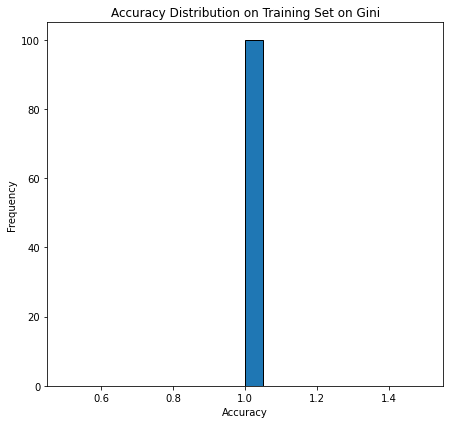

In [39]:

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(accuracy_train, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Training Set on Gini')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


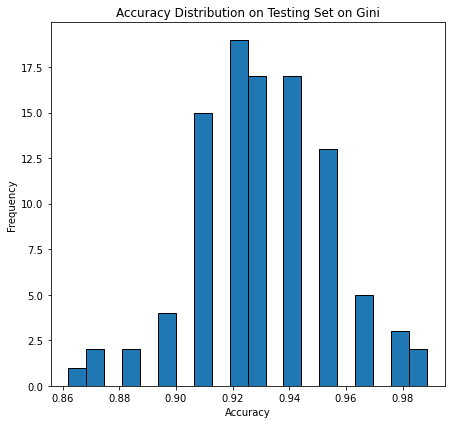

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(accuracy_test, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Testing Set on Gini')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Decision Trees with 0.85 threshold

In [59]:
def decision_tree(X_train, y_train, remaining_attributes):
    # If all instances belong to the same class
    if len(set(y_train)) == 1:
        return {"class_label": y_train.iloc[0]}
    if not remaining_attributes or len(y_train) <= 0.85 * len(X_train):
        # If no more attributes left or instances threshold reached
        class_counts = y_train.value_counts()
        majority_class = class_counts.idxmax()
        return {"class_label": majority_class}

    info_gain_values = [information_gain(y_train, X_train[attr]) for attr in remaining_attributes]
    best_attribute = remaining_attributes[np.argmax(info_gain_values)] # Highest info gain attribute
    remaining_attributes_copy = remaining_attributes.copy()  # Make a copy
    remaining_attributes_copy.remove(best_attribute) # L(attr)-Selected(attr)
    remaining_attributes = remaining_attributes_copy.copy()  # Update remaining_attributes
    
    # Create a dictionary for the current decision node
    node = {"attribute": best_attribute, "leaf": {}}
    # Create a list of values for the selected attribute
    attribute_values = set(X_train[best_attribute])

    # For each attribute value, create sub-trees and edges
    for value in attribute_values:
        # Partition - based on the attribute value
        partition = X_train[X_train[best_attribute] == value]

        if partition.empty:
            # If partition is empty, leaf node = node with majority class
            majority_class = y_train.value_counts().idxmax()
            node["leaf"][value] = {"class_label": majority_class}
        else:
            # Recursively create a sub-tree
            subtree = decision_tree(partition, y_train[partition.index], remaining_attributes)
            node["leaf"][value] = subtree
    return node

def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

def information_gain(y, x):
    parent_entropy = entropy(y)
    # InfoA(D)
    info_a = 0
    for value in set(x):
        partition_indices = x[x == value].index
        partition_entropy = entropy(y[partition_indices])
        info_a += len(partition_indices) / len(x) * partition_entropy
    # GainA(D)
    gain_a = parent_entropy - info_a
    return gain_a

In [60]:
def predict_single(x, tree):
    if 'class_label' in tree:
        # Single data point
        return tree['class_label']
    else:
        value = x[tree['attribute']]
        if value in tree['leaf']:
            # leaf has only class label or a nested dictionary
            next_node = tree['leaf'][value]
            if 'class_label' in next_node:
                return next_node['class_label']
            else:
                return predict_single(x, next_node)
        else:
            return list(tree['leaf'].values())[0]

def predict(X, tree):
    return [predict_single(x, tree) for i, x in X.iterrows()]

In [61]:
attributes = df_voting_shuffle.columns[:-1].tolist()
target = df_voting_shuffle['target']
train_df, test_df = train_test_split(df_voting_shuffle, test_size=0.2, random_state=34)

 # Split the DataFrame into features and target for training and testing sets
X_train, y_train = train_df[attributes], train_df['target']
X_test, y_test = test_df[attributes], test_df['target']

# Build the decision tree using the training set
root_node = decision_tree(X_train, y_train, attributes)

In [62]:
# Function to calculate accuracy
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

# Function to train and evaluate Decision Tree 100 times
def run_decision_tree(df, attributes, target, num_iterations=100):
    accuracy_train_list = []
    accuracy_test_list = []

    for i in range(num_iterations):
        # Shuffle the dataset
        df_shuffled = shuffle(df)

        # Split the DataFrame into features and target for training and testing sets
        train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=np.random.randint(1, 1000))

        X_train, y_train = train_df[attributes], train_df[target]
        X_test, y_test = test_df[attributes], test_df[target]

        # Build the decision tree using the training set
        root_node = decision_tree(X_train, y_train, attributes)

        # Make predictions on the training set
        predictions_train = predict(X_train, root_node)
        accuracy_train = calculate_accuracy(predictions_train, y_train)
        accuracy_train_list.append(accuracy_train)

        # Make predictions on the test set
        predictions_test = predict(X_test, root_node)
        accuracy_test = calculate_accuracy(predictions_test, y_test)
        accuracy_test_list.append(accuracy_test)
        
    return accuracy_train_list, accuracy_test_list

In [63]:
# Run the experiment
attributes = df_voting_shuffle.columns[:-1].tolist()
target = 'target'
df_voting_shuffle = shuffle(df_voting_shuffle, random_state=np.random.randint(1, 1000)) 
accuracy_train, accuracy_test = run_decision_tree(df_voting_shuffle, attributes, target)

In [64]:
mean_accuracy_train = np.mean(accuracy_train)
mean_accuracy_test = np.mean(accuracy_test)

# Print or use the values as needed
print("Mean Training Accuracy:", mean_accuracy_train)
print("Mean Testing Accuracy:", mean_accuracy_test)


std_dev_accuracy_train = np.std(accuracy_train)
std_dev_accuracy_test = np.std(accuracy_test)

print("Standard Deviation Training Accuracy:", std_dev_accuracy_train)
print("Standard Deviation Testing Accuracy:", std_dev_accuracy_test)

Mean Training Accuracy: 1.0
Mean Testing Accuracy: 0.9331034482758621
Standard Deviation Training Accuracy: 0.0
Standard Deviation Testing Accuracy: 0.02456545313335337


Text(0, 0.5, 'Frequency')

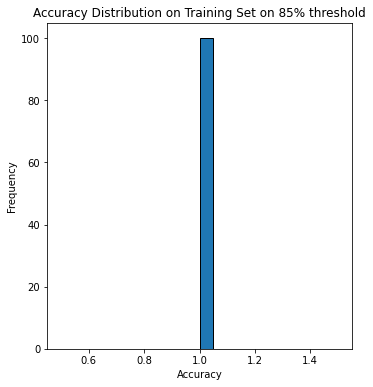

In [65]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(accuracy_train, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Training Set on 85% threshold')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')


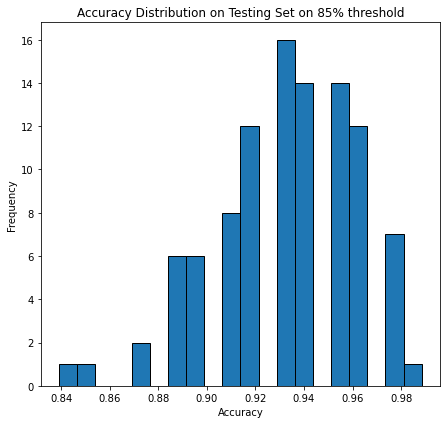

In [31]:
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(accuracy_test, bins=20, edgecolor='black')
plt.title('Accuracy Distribution on Testing Set on 85% threshold')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
